In [169]:
import pandas as pd

from pandas import Series,DataFrame


In [234]:
fifa_df = pd.read_csv('fifa.csv')

In [235]:
fifa_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [236]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import operator
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

In [174]:
#First some basic questions:

#1.) Who the Name playres on now? (Ages,Marking,Overall,..etc)

C:\Users\MSI\Anaconda2\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


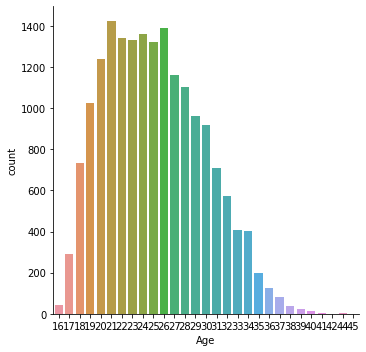

In [175]:
sns.factorplot('Age', data=fifa_df, kind="count")

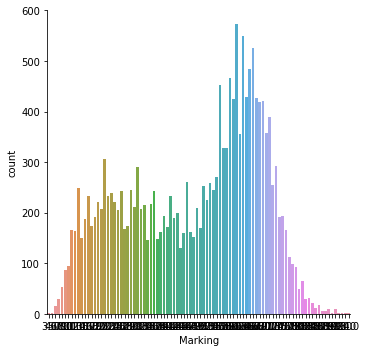

In [176]:
sns.factorplot('Marking', data=fifa_df, kind="count")

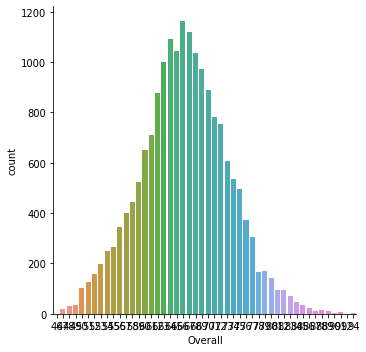

In [177]:
sns.factorplot('Overall', data=fifa_df, kind="count")                      

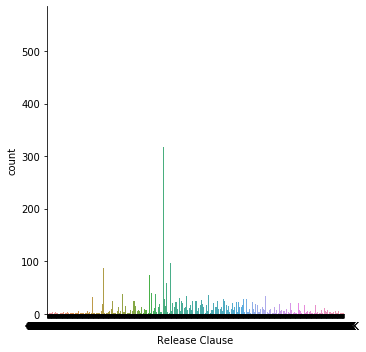

In [178]:
sns.factorplot('Release Clause',data=fifa_df, kind="count")

In [179]:
fifa_df.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [180]:
fifa_df.describe()


,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [181]:
# checking if the data contains any NULL value

fifa_df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [182]:
# this is detemain which one available or not available in next transfer

def Available_UnAvailable(Unnamed):
    Age,Overall=Unnamed
    if Age <=25:
        return 'Available'
    elif Age >30:
        return 'UnAvailable'
    else:
        return 'Out of Order'

In [183]:
fifa_df['state of palyers'] = fifa_df[['Age','Overall']].apply(Available_UnAvailable,axis=1)

In [184]:
fifa_df[0:10]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,state of palyers
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,UnAvailable
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,UnAvailable
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,Out of Order
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,Out of Order
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,Out of Order
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M,Out of Order
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M,UnAvailable
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M,UnAvailable
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M,UnAvailable
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M,Available


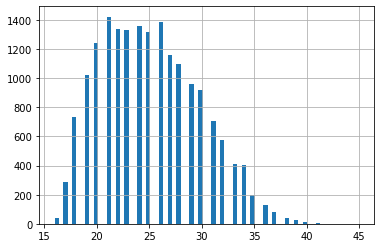

In [185]:
fifa_df['Age'].hist(bins=70)

In [186]:
fifa_df['Age'].mean()

25.122205745043114

In [187]:
fifa_df['state of palyers'].value_counts()

Available       10099
Out of Order     5526
UnAvailable      2582
Name: state of palyers, dtype: int64

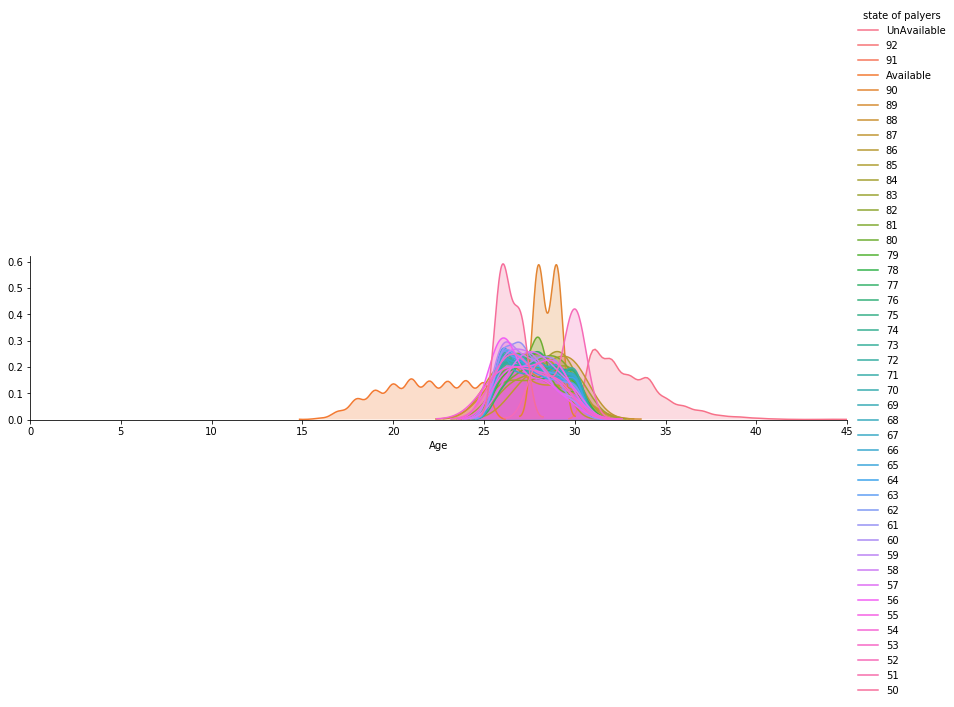

In [33]:
fig = sns.FacetGrid(fifa_df,hue='state of palyers',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = fifa_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

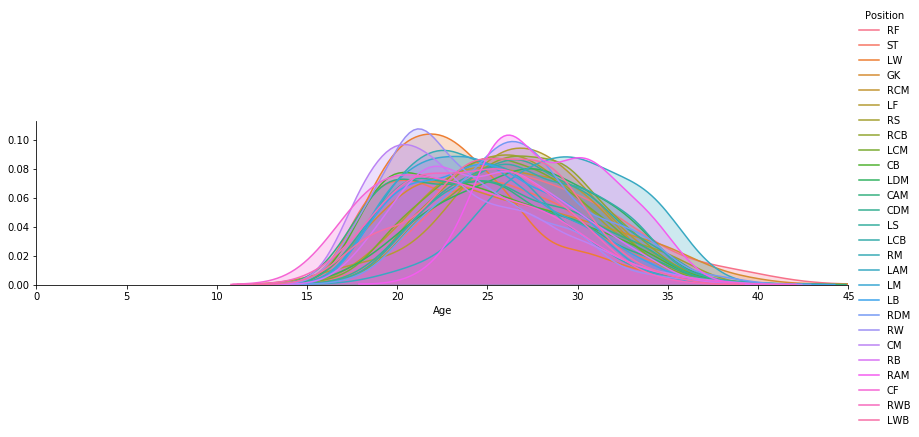

In [72]:
fig = sns.FacetGrid(fifa_df,hue='Position',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = fifa_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

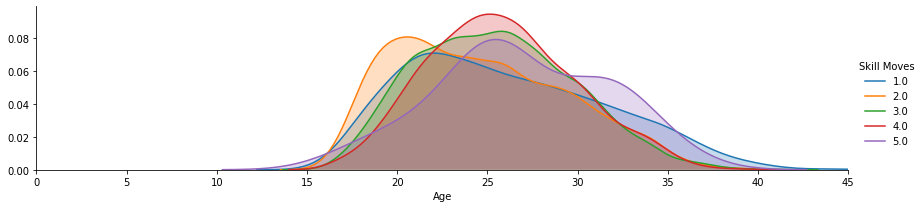

In [76]:
fig = sns.FacetGrid(fifa_df,hue='Skill Moves',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = fifa_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [82]:
fifa_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,state of palyers
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,UnAvailable
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,UnAvailable
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,Out of Order
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,Out of Order
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,Out of Order


In [84]:
#2.) how many Foreign players in the general?


Foreign_players = fifa_df['Nationality'].dropna()

In [85]:
Foreign_players.head()

0    Argentina
1     Portugal
2       Brazil
3        Spain
4      Belgium
Name: Nationality, dtype: object

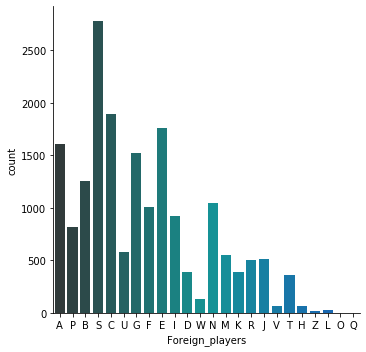

In [86]:
levels = []
for level in Foreign_players:
    levels.append(level[0])
    
Foreign_players_df = DataFrame(levels)

Foreign_players_df.columns = ['Foreign_players']

sns.factorplot('Foreign_players',data=Foreign_players_df,palette='winter_d',kind="count")

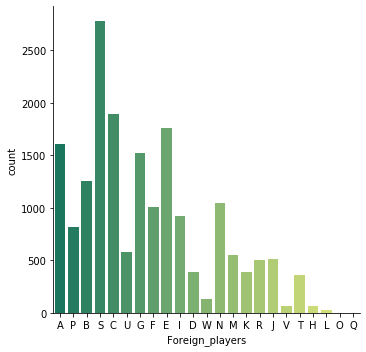

In [103]:
Foreign_players_df = Foreign_players_df[Foreign_players_df.Foreign_players!='Z']
sns.factorplot('Foreign_players',data=Foreign_players_df,palette='summer',kind="count")

In [138]:
fifa_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


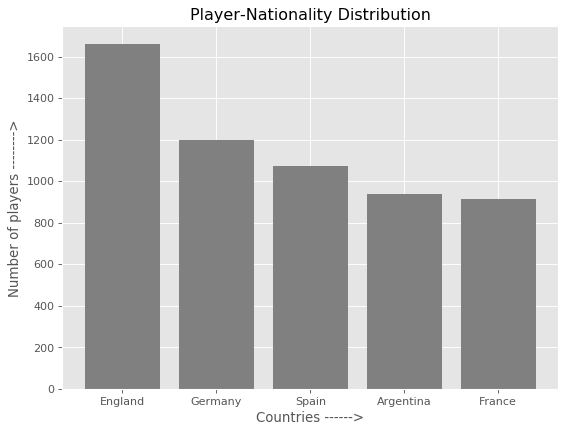

In [145]:
countries = list(fifa_df.groupby(['Nationality']).groups.keys())
temp = fifa_df.groupby(['Nationality']).count()
temp = list(temp.loc[:,"Name"])
countries_dict = dict(zip(countries,temp))
sorted_countries = sorted(countries_dict.items(), key=operator.itemgetter(1),reverse=True)
countries_dict = dict(sorted_countries)
countries_dict = {k: countries_dict[k] for k in list(countries_dict)[:5]}
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context(('ggplot')):
    plt.bar(countries_dict.keys(), countries_dict.values(),color="grey")
    plt.xlabel('Countries ------>')
    plt.ylabel('Number of players -------->')
    plt.title('Player-Nationality Distribution')
    plt.show()

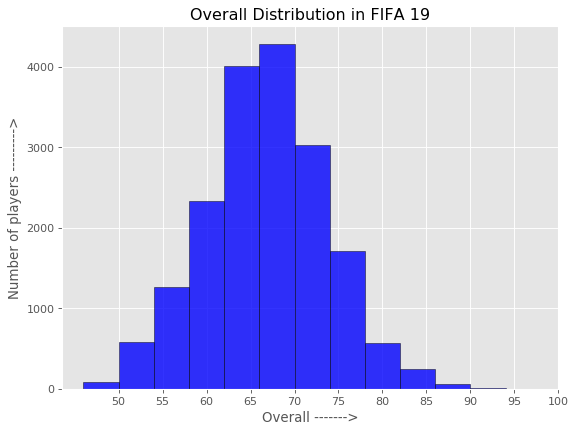

In [146]:
overall = list(fifa_df.loc[:,"Overall"])
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context(('ggplot')):
    plt.hist(overall, bins=12, ec='black', alpha=0.8, color='blue')
    plt.xlabel("Overall ------->")
    plt.ylabel("Number of players --------->")
    plt.xticks([50,55,60,65,70,75,80,85,90,95,100])
    plt.title("Overall Distribution in FIFA 19")
    plt.show()

In [147]:
#Let us now have a look at how the overall rating of footballers ranges in accordance to their playing position. We will group the positions into three main positions of a football i.e. Defender, Midfielder and Forward, and include goalkeepers inside the defenders grouping.

Text(0.5, 1.0, 'Range of Forward Overalls')

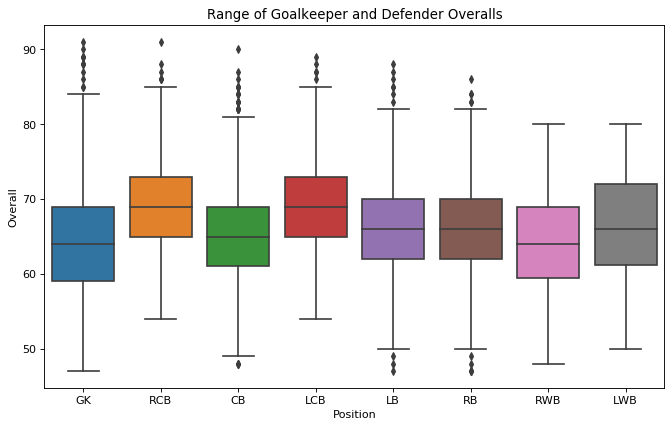

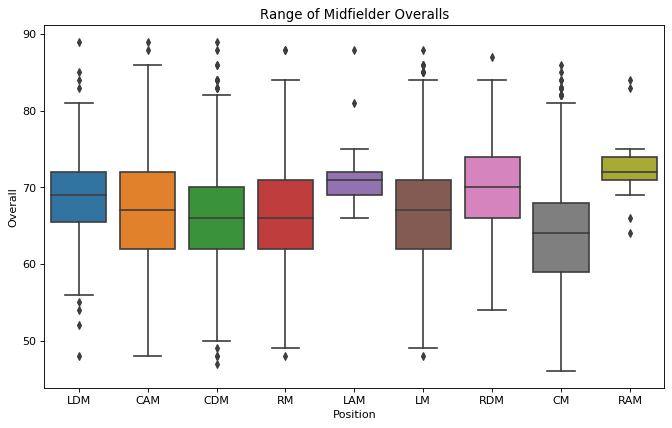

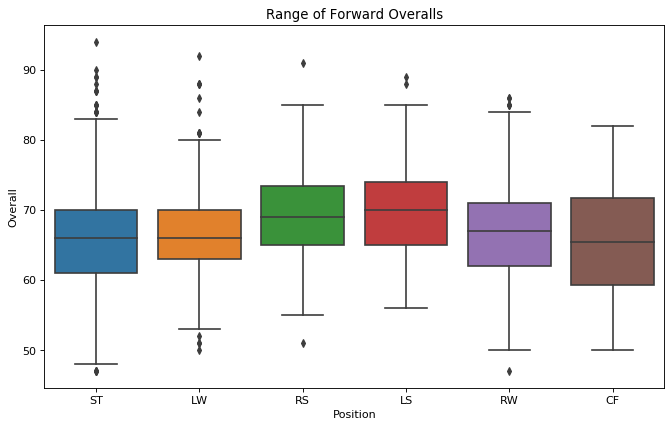

In [152]:
gk_defenders = fifa_df.loc[fifa_df['Position'].isin(['GK','RWB','RB','RCB','CB','LCB','LB','LWB'])]
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x= gk_defenders['Position'], y=gk_defenders['Overall']).set_title('Range of Goalkeeper and Defender Overalls')
midfielders = fifa_df.loc[fifa_df['Position'].isin(['RM','CM','LM','CDM','RDM','LDM','RAM','CAM','LAM'])]
figure(num=None, figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=midfielders['Position'],y=midfielders['Overall']).set_title('Range of Midfielder Overalls')
forwards = fifa_df.loc[fifa_df['Position'].isin(['RW','CF','LW','ST','RS','LS'])]
figure(num=None, figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=forwards['Position'], y=forwards['Overall']).set_title('Range of Forward Overalls')

In [153]:
#We will now have a look at whether the position of a footballer has an adverse impact on his ability.



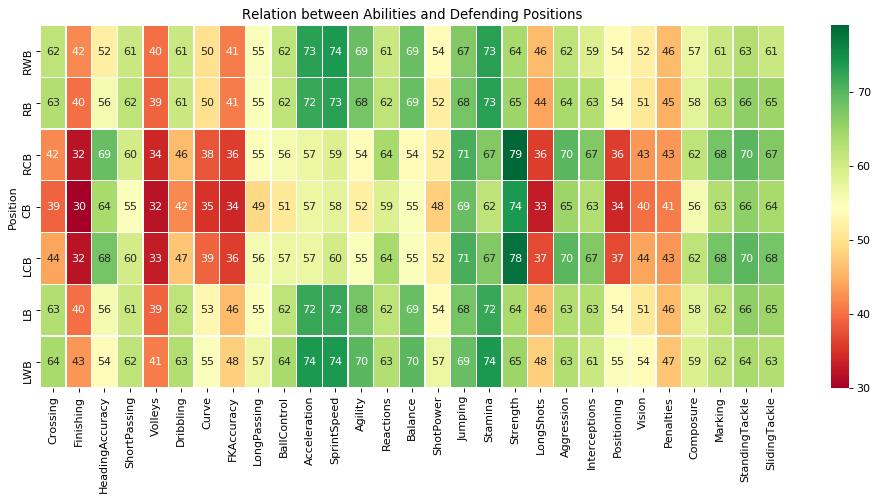

In [154]:
heatmap_df = fifa_df.filter(['Position','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling',
                               'Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility',
                                'Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression',
                               'Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle',
                               'SlidingTackle']).groupby('Position').mean()
heatmap_df_defenders = heatmap_df.loc[['RWB','RB','RCB','CB','LCB','LB','LWB']]
heatmap_df_defenders = heatmap_df_defenders.round().astype(int)
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(heatmap_df_defenders,annot=heatmap_df_defenders,fmt="",cmap="RdYlGn",linewidths=0.3)
plt.title('Relation between Abilities and Defending Positions')
plt.show()

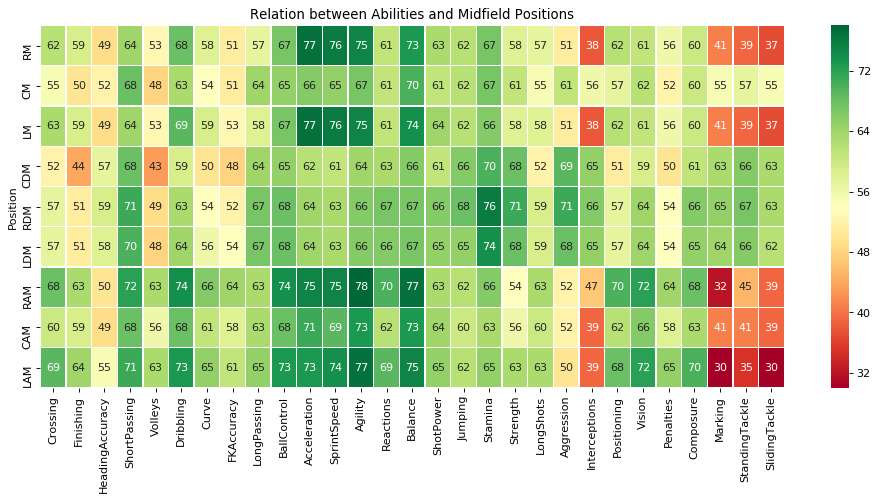

In [155]:
heatmap_df_midfielders = heatmap_df.loc[['RM','CM','LM','CDM','RDM','LDM','RAM','CAM','LAM']]
heatmap_df_midfielders = heatmap_df_midfielders.round().astype(int)
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(heatmap_df_midfielders,annot=heatmap_df_midfielders,fmt="",cmap="RdYlGn",linewidths=0.3)
plt.title('Relation between Abilities and Midfield Positions')
plt.show()

In [188]:
# we will have a look at how Wages ratings affect the valuation of a footballer with the help of a scatter plot

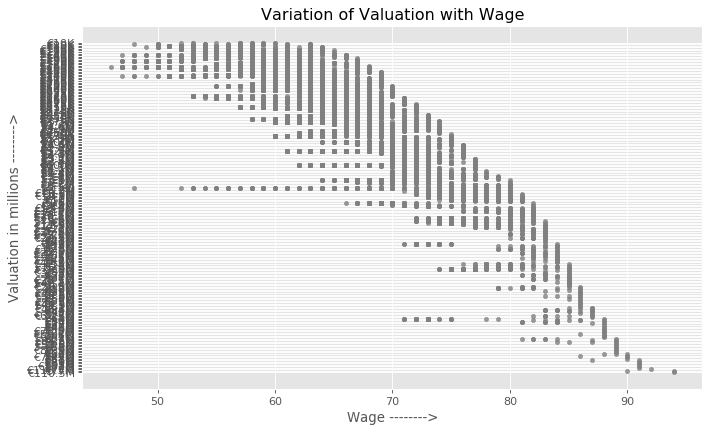

In [197]:
value_list = list(fifa_df.loc[:,'Value'])
Wage = list(fifa_df.loc[:,'Wage'])
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context('ggplot'):
    plt.scatter(overall,value_list,s=15,alpha=0.8,c='grey')
    plt.xlabel('Wage -------->')
    plt.ylabel('Valuation in millions -------->')
    plt.title('Variation of Valuation with Wage')
    plt.show()

In [198]:
#t is easily noticeable that the valuation of a footballer increases with his overall rating.

#PLAYING MANAGER MODE

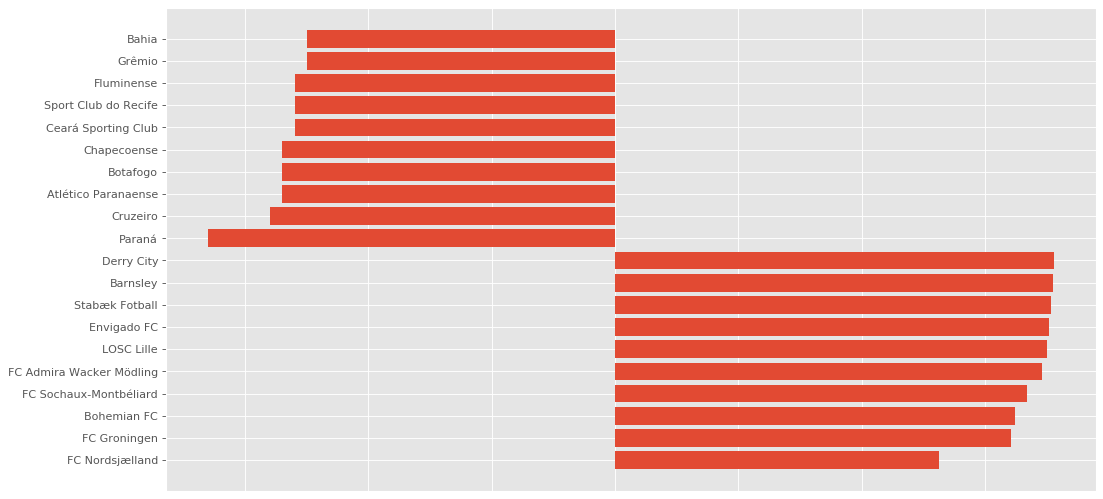

In [203]:
clubs_df = fifa_df.groupby('Club').mean()
clubs_df_youngest = clubs_df.sort_values(['Age'],ascending=True)
clubs_df_youngest = clubs_df_youngest['Age']
clubs_df_youngest = clubs_df_youngest[0:10]
clubs_df_eldest = clubs_df.sort_values(['Age'],ascending=False)
clubs_df_eldest = clubs_df_eldest['Age']
clubs_df_eldest = clubs_df_eldest[0:10]
clubs_youngest_eldest = pd.concat([clubs_df_youngest, clubs_df_eldest])
clubs_youngest_plot = list(clubs_df_youngest)
clubs_youngest_plot[:] = [age - 15 for age in clubs_youngest_plot]
clubs_eldest_plot = list(clubs_df_eldest)
clubs_eldest_plot[:] = [age - 25 for age in clubs_eldest_plot]
clubs_eldest_plot[:] = [-age for age in clubs_eldest_plot]
clubs_plot = clubs_youngest_plot + clubs_eldest_plot
youngest_eldest_clubs = list(clubs_youngest_eldest.index.values)
with plt.style.context('ggplot'):
    figure(num=None, figsize=(15, 8), dpi=80, edgecolor='k')
    plt.barh(youngest_eldest_clubs, clubs_plot)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    clubs_youngest_eldest = list(clubs_youngest_eldest)
    plt.show()

In [204]:
# Top talented clubs in fifa 19

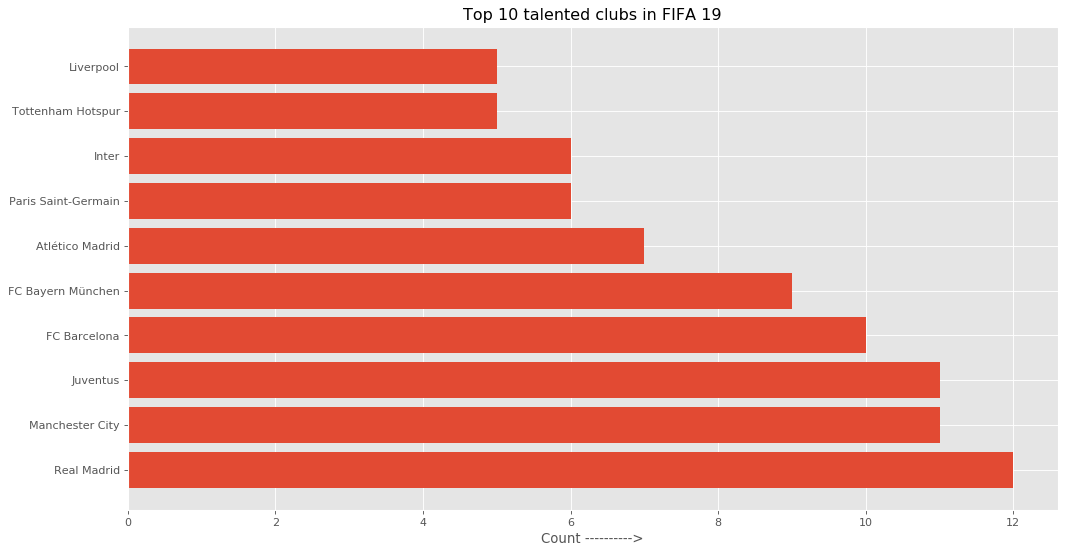

In [205]:
talents_df = fifa_df.filter(["Name", "Club", "Overall"])
talents_df = talents_df[talents_df.Overall >= 85]
talents_df = talents_df.groupby("Club").count()
talents_df = talents_df.sort_values(by=['Name'],ascending=False)
talents_df = talents_df[:10]
talents_clubs = list(talents_df.index.values)
talents_count = list(talents_df.iloc[:, 1])
with plt.style.context('ggplot'):
    figure(num=None, figsize=(15, 8), dpi=80, edgecolor='k')
    plt.barh(talents_clubs, talents_count)
    plt.title('Top 10 talented clubs in FIFA 19')
    plt.xlabel('Count ---------->')
    plt.show()

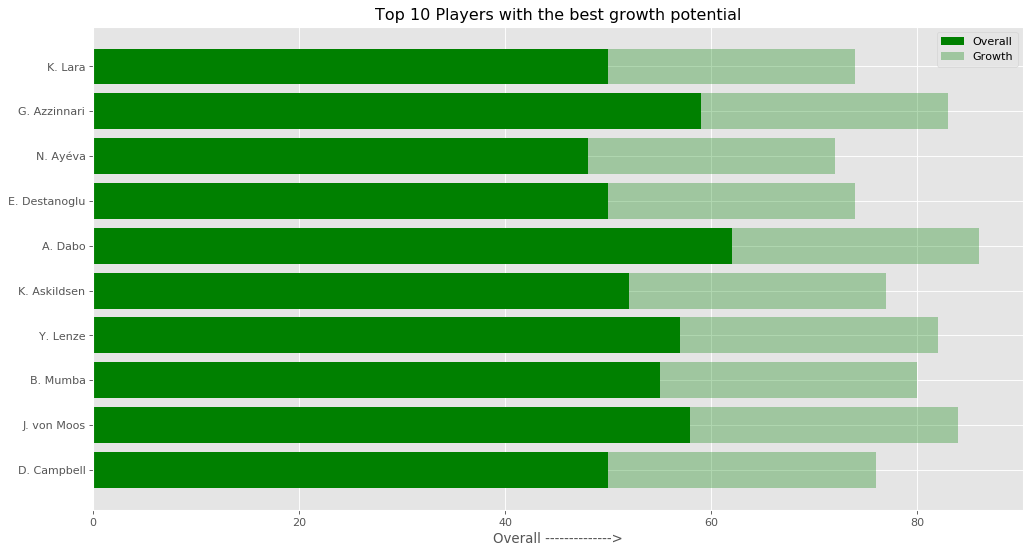

In [222]:
potential_df = fifa_df.filter(['Name','Age','Overall','Potential'])
potential_df['Growth'] = potential_df['Potential'] - potential_df['Overall']
potential_df = potential_df.sort_values(by=['Growth'],ascending=False)
potential_df = potential_df.iloc[:10]
players_list = list(potential_df.iloc[:, 0])
overall_list = list(potential_df.iloc[:,2])
growth_list = list(potential_df.iloc[:,4])
with plt.style.context('ggplot'):
    figure(num=None, figsize=(15, 8), dpi=80, edgecolor='k')
    plt.barh(players_list, overall_list, color='green', label='Overall')
    plt.barh(players_list, growth_list, left=overall_list, color='green', label='Growth', alpha=0.3)
    plt.legend()
    plt.title('Top 10 Players with the best growth potential')
    plt.xlabel('Overall -------------->')
    plt.show()

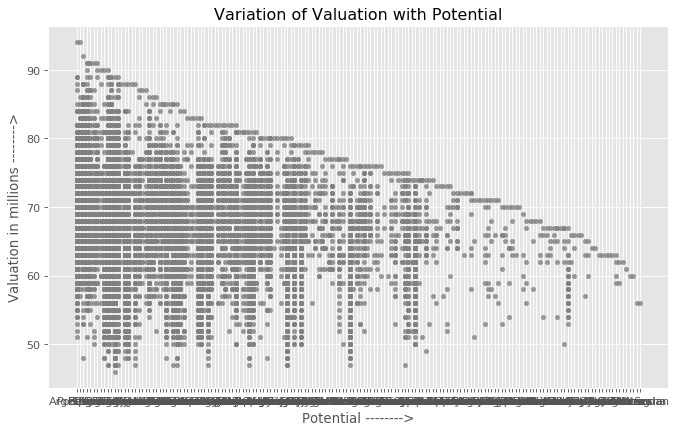

In [233]:
pot = list(fifa_df.iloc[:,5])
val = list(fifa_df.iloc[:,7])
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context('ggplot'):
    plt.scatter(pot,val,s=15,alpha=0.8,c='grey')
    plt.xlabel('Potential -------->')
    plt.ylabel('Valuation in millions -------->')
    plt.title('Variation of Valuation with Potential')
    plt.show()